TASK 4 Multilayer Perception for Image Classification

In [63]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2):
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label

In [64]:
def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
    Path to the data directory
    train_list : List
    A list containing the name of the images.
    img_h : Int
    image height to be resized to.
    img_w : Int
    image width to be resized to.
    Returns
    -------
    img_labels : Nested List
    A nested list containing the loaded images along with their
    correcponding labels.
    """
    img_labels = []
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray=True)  # "as_grey"
    img = resize(img, (img_h, img_w), anti_aliasing=True).astype('float32')
    img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

    if item[0] % 100 == 0:
        print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))

    shuffle(img_labels)
    return img_labels

In [65]:
def get_data_arrays(nested_list, img_h, img_w):
    """
     Parameters
     ----------
     nested_list : nested list
     nested list of image arrays with corresponding class labels.
     img_h : Int
     Image height.
     img_w : Int
     Image width.
     Returns
      -------
     img_arrays : Numpy array
     4D Array with the size of (n_data,img_h,img_w, 1)
     label_arrays : Numpy array
     1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype=np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype=np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis=3)
    return img_arrays, label_arrays


In [66]:
def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """

    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)

    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del (train_data)
    del (test_data)
    return train_img, test_img, train_label, test_label


In [67]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
     train_data_path, test_data_path,
     train_list, test_list, img_h, img_w)

In [68]:
print(type(x_train), x_train.shape,x_test.shape,img_w)

<class 'numpy.ndarray'> (1, 128, 128, 1) (1, 128, 128, 1) 128


Functional API

In [69]:
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

def model(img_width, img_height, img_ch, base_dense):
        """
        Functional API model.
        name the last layer as "out"; e.g., out = ....
        """        
        input_size = (img_width, img_height, img_ch)
        inputs_layer = Input(shape=input_size, name='input_layer')
        inputs_layer1 = Flatten()(inputs_layer)
        # TODO
        den1 = Dense(base_dense,activation = 'relu')(inputs_layer1)
        den2 = Dense(base_dense/2,activation = 'relu')(den1)
        den3 = Dense(base_dense/2,activation = 'relu')(den2)
        out = Dense(1, activation = 'sigmoid')(den3)
        clf = Model(inputs=inputs_layer, outputs=out)
        clf.summary()
        return clf



In [89]:
base_dense = 256#64
batchsize = 16
n_epochs = 1500  #50
LR = 0.0001  #0.1
clf =  model(img_w, img_h, 1, base_dense)

clf.compile(loss='binary_crossentropy',
              optimizer = SGD(lr = LR),
              metrics=['binary_accuracy'])

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 129       
Total params: 4,244,097
Trainable params: 4,244,097
Non-trainable params: 0
________________________________________________

In [90]:
print(img_w,y_train.shape,y_test.shape,x_test.shape,x_train.shape)

128 (1,) (1,) (1, 128, 128, 1) (1, 128, 128, 1)


In [91]:
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))

Train on 1 samples, validate on 1 samples
Epoch 1/1500
1/1 [==============================] - 0s 326ms/sample - loss: 0.5149 - binary_accuracy: 1.0000 - val_loss: 0.4912 - val_binary_accuracy: 1.0000
Epoch 2/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.4879 - binary_accuracy: 1.0000 - val_loss: 0.4761 - val_binary_accuracy: 1.0000
Epoch 3/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.4640 - binary_accuracy: 1.0000 - val_loss: 0.4626 - val_binary_accuracy: 1.0000
Epoch 4/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.4425 - binary_accuracy: 1.0000 - val_loss: 0.4498 - val_binary_accuracy: 1.0000
Epoch 5/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.4228 - binary_accuracy: 1.0000 - val_loss: 0.4375 - val_binary_accuracy: 1.0000
Epoch 6/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.4048 - binary_accuracy: 1.0000 - val_loss: 0.4256 - val_binary_accuracy: 1.0000
Epoch 7/1500
1/1 [==

Epoch 53/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.1577 - binary_accuracy: 1.0000 - val_loss: 0.1842 - val_binary_accuracy: 1.0000
Epoch 54/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.1555 - binary_accuracy: 1.0000 - val_loss: 0.1816 - val_binary_accuracy: 1.0000
Epoch 55/1500
1/1 [==============================] - 0s 25ms/sample - loss: 0.1535 - binary_accuracy: 1.0000 - val_loss: 0.1793 - val_binary_accuracy: 1.0000
Epoch 56/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.1514 - binary_accuracy: 1.0000 - val_loss: 0.1768 - val_binary_accuracy: 1.0000
Epoch 57/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.1495 - binary_accuracy: 1.0000 - val_loss: 0.1744 - val_binary_accuracy: 1.0000
Epoch 58/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.1475 - binary_accuracy: 1.0000 - val_loss: 0.1720 - val_binary_accuracy: 1.0000
Epoch 59/1500
1/1 [==============================] - 0s 6

Epoch 106/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0892 - binary_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 1.0000
Epoch 107/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0884 - binary_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_accuracy: 1.0000
Epoch 108/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0876 - binary_accuracy: 1.0000 - val_loss: 0.1013 - val_binary_accuracy: 1.0000
Epoch 109/1500
1/1 [==============================] - 0s 27ms/sample - loss: 0.0869 - binary_accuracy: 1.0000 - val_loss: 0.1003 - val_binary_accuracy: 1.0000
Epoch 110/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0861 - binary_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 1.0000
Epoch 111/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0853 - binary_accuracy: 1.0000 - val_loss: 0.0986 - val_binary_accuracy: 1.0000
Epoch 112/1500
1/1 [==============================]

Epoch 158/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0605 - binary_accuracy: 1.0000 - val_loss: 0.0690 - val_binary_accuracy: 1.0000
Epoch 159/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0602 - binary_accuracy: 1.0000 - val_loss: 0.0686 - val_binary_accuracy: 1.0000
Epoch 160/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0598 - binary_accuracy: 1.0000 - val_loss: 0.0682 - val_binary_accuracy: 1.0000
Epoch 161/1500
1/1 [==============================] - 0s 25ms/sample - loss: 0.0594 - binary_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 1.0000
Epoch 162/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0591 - binary_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 1.0000
Epoch 163/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0587 - binary_accuracy: 1.0000 - val_loss: 0.0669 - val_binary_accuracy: 1.0000
Epoch 164/1500
1/1 [==============================]

Epoch 210/1500
1/1 [==============================] - 0s 22ms/sample - loss: 0.0455 - binary_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 1.0000
Epoch 211/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0453 - binary_accuracy: 1.0000 - val_loss: 0.0507 - val_binary_accuracy: 1.0000
Epoch 212/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0451 - binary_accuracy: 1.0000 - val_loss: 0.0504 - val_binary_accuracy: 1.0000
Epoch 213/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0449 - binary_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 1.0000
Epoch 214/1500
1/1 [==============================] - 0s 11ms/sample - loss: 0.0447 - binary_accuracy: 1.0000 - val_loss: 0.0499 - val_binary_accuracy: 1.0000
Epoch 215/1500
1/1 [==============================] - 0s 12ms/sample - loss: 0.0445 - binary_accuracy: 1.0000 - val_loss: 0.0496 - val_binary_accuracy: 1.0000
Epoch 216/1500
1/1 [=============================

Epoch 262/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0355 - binary_accuracy: 1.0000 - val_loss: 0.0393 - val_binary_accuracy: 1.0000
Epoch 263/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0354 - binary_accuracy: 1.0000 - val_loss: 0.0391 - val_binary_accuracy: 1.0000
Epoch 264/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0352 - binary_accuracy: 1.0000 - val_loss: 0.0389 - val_binary_accuracy: 1.0000
Epoch 265/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0351 - binary_accuracy: 1.0000 - val_loss: 0.0388 - val_binary_accuracy: 1.0000
Epoch 266/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0349 - binary_accuracy: 1.0000 - val_loss: 0.0386 - val_binary_accuracy: 1.0000
Epoch 267/1500
1/1 [==============================] - 0s 18ms/sample - loss: 0.0348 - binary_accuracy: 1.0000 - val_loss: 0.0384 - val_binary_accuracy: 1.0000
Epoch 268/1500
1/1 [==============================]

Epoch 314/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0289 - binary_accuracy: 1.0000 - val_loss: 0.0316 - val_binary_accuracy: 1.0000
Epoch 315/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0288 - binary_accuracy: 1.0000 - val_loss: 0.0315 - val_binary_accuracy: 1.0000
Epoch 316/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0287 - binary_accuracy: 1.0000 - val_loss: 0.0314 - val_binary_accuracy: 1.0000
Epoch 317/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0285 - binary_accuracy: 1.0000 - val_loss: 0.0313 - val_binary_accuracy: 1.0000
Epoch 318/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0285 - binary_accuracy: 1.0000 - val_loss: 0.0312 - val_binary_accuracy: 1.0000
Epoch 319/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0284 - binary_accuracy: 1.0000 - val_loss: 0.0311 - val_binary_accuracy: 1.0000
Epoch 320/1500
1/1 [==============================] 

Epoch 366/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0244 - binary_accuracy: 1.0000 - val_loss: 0.0266 - val_binary_accuracy: 1.0000
Epoch 367/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0243 - binary_accuracy: 1.0000 - val_loss: 0.0265 - val_binary_accuracy: 1.0000
Epoch 368/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0243 - binary_accuracy: 1.0000 - val_loss: 0.0265 - val_binary_accuracy: 1.0000
Epoch 369/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0242 - binary_accuracy: 1.0000 - val_loss: 0.0264 - val_binary_accuracy: 1.0000
Epoch 370/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0241 - binary_accuracy: 1.0000 - val_loss: 0.0263 - val_binary_accuracy: 1.0000
Epoch 371/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0240 - binary_accuracy: 1.0000 - val_loss: 0.0262 - val_binary_accuracy: 1.0000
Epoch 372/1500
1/1 [==============================] 

Epoch 418/1500
1/1 [==============================] - 0s 26ms/sample - loss: 0.0211 - binary_accuracy: 1.0000 - val_loss: 0.0229 - val_binary_accuracy: 1.0000
Epoch 419/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0211 - binary_accuracy: 1.0000 - val_loss: 0.0229 - val_binary_accuracy: 1.0000
Epoch 420/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0210 - binary_accuracy: 1.0000 - val_loss: 0.0228 - val_binary_accuracy: 1.0000
Epoch 421/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0210 - binary_accuracy: 1.0000 - val_loss: 0.0227 - val_binary_accuracy: 1.0000
Epoch 422/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0209 - binary_accuracy: 1.0000 - val_loss: 0.0227 - val_binary_accuracy: 1.0000
Epoch 423/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0208 - binary_accuracy: 1.0000 - val_loss: 0.0226 - val_binary_accuracy: 1.0000
Epoch 424/1500
1/1 [==============================]

Epoch 470/1500
1/1 [==============================] - 0s 24ms/sample - loss: 0.0186 - binary_accuracy: 1.0000 - val_loss: 0.0201 - val_binary_accuracy: 1.0000
Epoch 471/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0185 - binary_accuracy: 1.0000 - val_loss: 0.0201 - val_binary_accuracy: 1.0000
Epoch 472/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0185 - binary_accuracy: 1.0000 - val_loss: 0.0200 - val_binary_accuracy: 1.0000
Epoch 473/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0185 - binary_accuracy: 1.0000 - val_loss: 0.0200 - val_binary_accuracy: 1.0000
Epoch 474/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0184 - binary_accuracy: 1.0000 - val_loss: 0.0199 - val_binary_accuracy: 1.0000
Epoch 475/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0184 - binary_accuracy: 1.0000 - val_loss: 0.0199 - val_binary_accuracy: 1.0000
Epoch 476/1500
1/1 [==============================]

Epoch 522/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0166 - binary_accuracy: 1.0000 - val_loss: 0.0179 - val_binary_accuracy: 1.0000
Epoch 523/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0165 - binary_accuracy: 1.0000 - val_loss: 0.0179 - val_binary_accuracy: 1.0000
Epoch 524/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0165 - binary_accuracy: 1.0000 - val_loss: 0.0178 - val_binary_accuracy: 1.0000
Epoch 525/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0165 - binary_accuracy: 1.0000 - val_loss: 0.0178 - val_binary_accuracy: 1.0000
Epoch 526/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0164 - binary_accuracy: 1.0000 - val_loss: 0.0178 - val_binary_accuracy: 1.0000
Epoch 527/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0164 - binary_accuracy: 1.0000 - val_loss: 0.0177 - val_binary_accuracy: 1.0000
Epoch 528/1500
1/1 [==============================] 

Epoch 574/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0149 - binary_accuracy: 1.0000 - val_loss: 0.0161 - val_binary_accuracy: 1.0000
Epoch 575/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0149 - binary_accuracy: 1.0000 - val_loss: 0.0161 - val_binary_accuracy: 1.0000
Epoch 576/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0149 - binary_accuracy: 1.0000 - val_loss: 0.0161 - val_binary_accuracy: 1.0000
Epoch 577/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0148 - binary_accuracy: 1.0000 - val_loss: 0.0160 - val_binary_accuracy: 1.0000
Epoch 578/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0148 - binary_accuracy: 1.0000 - val_loss: 0.0160 - val_binary_accuracy: 1.0000
Epoch 579/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0148 - binary_accuracy: 1.0000 - val_loss: 0.0160 - val_binary_accuracy: 1.0000
Epoch 580/1500
1/1 [==============================] 

Epoch 626/1500
1/1 [==============================] - 0s 14ms/sample - loss: 0.0136 - binary_accuracy: 1.0000 - val_loss: 0.0147 - val_binary_accuracy: 1.0000
Epoch 627/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0136 - binary_accuracy: 1.0000 - val_loss: 0.0146 - val_binary_accuracy: 1.0000
Epoch 628/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0135 - binary_accuracy: 1.0000 - val_loss: 0.0146 - val_binary_accuracy: 1.0000
Epoch 629/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0135 - binary_accuracy: 1.0000 - val_loss: 0.0146 - val_binary_accuracy: 1.0000
Epoch 630/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0135 - binary_accuracy: 1.0000 - val_loss: 0.0146 - val_binary_accuracy: 1.0000
Epoch 631/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0135 - binary_accuracy: 1.0000 - val_loss: 0.0145 - val_binary_accuracy: 1.0000
Epoch 632/1500
1/1 [==============================]

Epoch 678/1500
1/1 [==============================] - 0s 26ms/sample - loss: 0.0125 - binary_accuracy: 1.0000 - val_loss: 0.0134 - val_binary_accuracy: 1.0000
Epoch 679/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0124 - binary_accuracy: 1.0000 - val_loss: 0.0134 - val_binary_accuracy: 1.0000
Epoch 680/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0124 - binary_accuracy: 1.0000 - val_loss: 0.0134 - val_binary_accuracy: 1.0000
Epoch 681/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0124 - binary_accuracy: 1.0000 - val_loss: 0.0134 - val_binary_accuracy: 1.0000
Epoch 682/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0124 - binary_accuracy: 1.0000 - val_loss: 0.0134 - val_binary_accuracy: 1.0000
Epoch 683/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0124 - binary_accuracy: 1.0000 - val_loss: 0.0133 - val_binary_accuracy: 1.0000
Epoch 684/1500
1/1 [==============================]

Epoch 730/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0115 - binary_accuracy: 1.0000 - val_loss: 0.0124 - val_binary_accuracy: 1.0000
Epoch 731/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0115 - binary_accuracy: 1.0000 - val_loss: 0.0124 - val_binary_accuracy: 1.0000
Epoch 732/1500
1/1 [==============================] - 0s 17ms/sample - loss: 0.0115 - binary_accuracy: 1.0000 - val_loss: 0.0124 - val_binary_accuracy: 1.0000
Epoch 733/1500
1/1 [==============================] - 0s 13ms/sample - loss: 0.0114 - binary_accuracy: 1.0000 - val_loss: 0.0124 - val_binary_accuracy: 1.0000
Epoch 734/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0114 - binary_accuracy: 1.0000 - val_loss: 0.0123 - val_binary_accuracy: 1.0000
Epoch 735/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0114 - binary_accuracy: 1.0000 - val_loss: 0.0123 - val_binary_accuracy: 1.0000
Epoch 736/1500
1/1 [==============================

Epoch 782/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0107 - binary_accuracy: 1.0000 - val_loss: 0.0115 - val_binary_accuracy: 1.0000
Epoch 783/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0106 - binary_accuracy: 1.0000 - val_loss: 0.0115 - val_binary_accuracy: 1.0000
Epoch 784/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0106 - binary_accuracy: 1.0000 - val_loss: 0.0115 - val_binary_accuracy: 1.0000
Epoch 785/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0106 - binary_accuracy: 1.0000 - val_loss: 0.0115 - val_binary_accuracy: 1.0000
Epoch 786/1500
1/1 [==============================] - 0s 22ms/sample - loss: 0.0106 - binary_accuracy: 1.0000 - val_loss: 0.0115 - val_binary_accuracy: 1.0000
Epoch 787/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0106 - binary_accuracy: 1.0000 - val_loss: 0.0114 - val_binary_accuracy: 1.0000
Epoch 788/1500
1/1 [==============================]

Epoch 834/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0099 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 835/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0099 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 836/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0099 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 837/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0099 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 838/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0099 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 839/1500
1/1 [==============================] - 0s 22ms/sample - loss: 0.0099 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 840/1500
1/1 [==============================]

Epoch 886/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0101 - val_binary_accuracy: 1.0000
Epoch 887/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0100 - val_binary_accuracy: 1.0000
Epoch 888/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0100 - val_binary_accuracy: 1.0000
Epoch 889/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0100 - val_binary_accuracy: 1.0000
Epoch 890/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0100 - val_binary_accuracy: 1.0000
Epoch 891/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0100 - val_binary_accuracy: 1.0000
Epoch 892/1500
1/1 [==============================] 

Epoch 938/1500
1/1 [==============================] - 0s 16ms/sample - loss: 0.0088 - binary_accuracy: 1.0000 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 939/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 940/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 941/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 942/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 943/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0094 - val_binary_accuracy: 1.0000
Epoch 944/1500
1/1 [==============================]

Epoch 990/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0083 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000
Epoch 991/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0083 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000
Epoch 992/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0082 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000
Epoch 993/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0082 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000
Epoch 994/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0082 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000
Epoch 995/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0082 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000
Epoch 996/1500
1/1 [==============================] 

Epoch 1042/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0078 - binary_accuracy: 1.0000 - val_loss: 0.0084 - val_binary_accuracy: 1.0000
Epoch 1043/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0078 - binary_accuracy: 1.0000 - val_loss: 0.0084 - val_binary_accuracy: 1.0000
Epoch 1044/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0078 - binary_accuracy: 1.0000 - val_loss: 0.0084 - val_binary_accuracy: 1.0000
Epoch 1045/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0078 - binary_accuracy: 1.0000 - val_loss: 0.0084 - val_binary_accuracy: 1.0000
Epoch 1046/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0078 - binary_accuracy: 1.0000 - val_loss: 0.0084 - val_binary_accuracy: 1.0000
Epoch 1047/1500
1/1 [==============================] - 0s 27ms/sample - loss: 0.0078 - binary_accuracy: 1.0000 - val_loss: 0.0084 - val_binary_accuracy: 1.0000
Epoch 1048/1500
1/1 [========================

Epoch 1094/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0074 - binary_accuracy: 1.0000 - val_loss: 0.0080 - val_binary_accuracy: 1.0000
Epoch 1095/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0074 - binary_accuracy: 1.0000 - val_loss: 0.0080 - val_binary_accuracy: 1.0000
Epoch 1096/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0074 - binary_accuracy: 1.0000 - val_loss: 0.0080 - val_binary_accuracy: 1.0000
Epoch 1097/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0074 - binary_accuracy: 1.0000 - val_loss: 0.0080 - val_binary_accuracy: 1.0000
Epoch 1098/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0074 - binary_accuracy: 1.0000 - val_loss: 0.0079 - val_binary_accuracy: 1.0000
Epoch 1099/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0074 - binary_accuracy: 1.0000 - val_loss: 0.0079 - val_binary_accuracy: 1.0000
Epoch 1100/1500
1/1 [=========================

Epoch 1146/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0071 - binary_accuracy: 1.0000 - val_loss: 0.0076 - val_binary_accuracy: 1.0000
Epoch 1147/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0071 - binary_accuracy: 1.0000 - val_loss: 0.0076 - val_binary_accuracy: 1.0000
Epoch 1148/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0070 - binary_accuracy: 1.0000 - val_loss: 0.0076 - val_binary_accuracy: 1.0000
Epoch 1149/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0070 - binary_accuracy: 1.0000 - val_loss: 0.0076 - val_binary_accuracy: 1.0000
Epoch 1150/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0070 - binary_accuracy: 1.0000 - val_loss: 0.0076 - val_binary_accuracy: 1.0000
Epoch 1151/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0070 - binary_accuracy: 1.0000 - val_loss: 0.0075 - val_binary_accuracy: 1.0000
Epoch 1152/1500
1/1 [=========================

Epoch 1198/1500
1/1 [==============================] - 0s 21ms/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.0072 - val_binary_accuracy: 1.0000
Epoch 1199/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.0072 - val_binary_accuracy: 1.0000
Epoch 1200/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.0072 - val_binary_accuracy: 1.0000
Epoch 1201/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.0072 - val_binary_accuracy: 1.0000
Epoch 1202/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.0072 - val_binary_accuracy: 1.0000
Epoch 1203/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.0072 - val_binary_accuracy: 1.0000
Epoch 1204/1500
1/1 [========================

Epoch 1250/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0064 - binary_accuracy: 1.0000 - val_loss: 0.0069 - val_binary_accuracy: 1.0000
Epoch 1251/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0064 - binary_accuracy: 1.0000 - val_loss: 0.0069 - val_binary_accuracy: 1.0000
Epoch 1252/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0064 - binary_accuracy: 1.0000 - val_loss: 0.0069 - val_binary_accuracy: 1.0000
Epoch 1253/1500
1/1 [==============================] - 0s 12ms/sample - loss: 0.0064 - binary_accuracy: 1.0000 - val_loss: 0.0069 - val_binary_accuracy: 1.0000
Epoch 1254/1500
1/1 [==============================] - 0s 17ms/sample - loss: 0.0064 - binary_accuracy: 1.0000 - val_loss: 0.0069 - val_binary_accuracy: 1.0000
Epoch 1255/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0064 - binary_accuracy: 1.0000 - val_loss: 0.0069 - val_binary_accuracy: 1.0000
Epoch 1256/1500
1/1 [=======================

Epoch 1302/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0062 - binary_accuracy: 1.0000 - val_loss: 0.0066 - val_binary_accuracy: 1.0000
Epoch 1303/1500
1/1 [==============================] - 0s 15ms/sample - loss: 0.0062 - binary_accuracy: 1.0000 - val_loss: 0.0066 - val_binary_accuracy: 1.0000
Epoch 1304/1500
1/1 [==============================] - 0s 15ms/sample - loss: 0.0062 - binary_accuracy: 1.0000 - val_loss: 0.0066 - val_binary_accuracy: 1.0000
Epoch 1305/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0062 - binary_accuracy: 1.0000 - val_loss: 0.0066 - val_binary_accuracy: 1.0000
Epoch 1306/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0061 - binary_accuracy: 1.0000 - val_loss: 0.0066 - val_binary_accuracy: 1.0000
Epoch 1307/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0061 - binary_accuracy: 1.0000 - val_loss: 0.0066 - val_binary_accuracy: 1.0000
Epoch 1308/1500
1/1 [=======================

Epoch 1354/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.0064 - val_binary_accuracy: 1.0000
Epoch 1355/1500
1/1 [==============================] - 0s 30ms/sample - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.0063 - val_binary_accuracy: 1.0000
Epoch 1356/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.0063 - val_binary_accuracy: 1.0000
Epoch 1357/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.0063 - val_binary_accuracy: 1.0000
Epoch 1358/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.0063 - val_binary_accuracy: 1.0000
Epoch 1359/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.0063 - val_binary_accuracy: 1.0000
Epoch 1360/1500
1/1 [========================

Epoch 1406/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 1.0000
Epoch 1407/1500
1/1 [==============================] - 0s 25ms/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 1.0000
Epoch 1408/1500
1/1 [==============================] - 0s 8ms/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 1.0000
Epoch 1409/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 1.0000
Epoch 1410/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 1.0000
Epoch 1411/1500
1/1 [==============================] - 0s 6ms/sample - loss: 0.0057 - binary_accuracy: 1.0000 - val_loss: 0.0061 - val_binary_accuracy: 1.0000
Epoch 1412/1500
1/1 [========================

Epoch 1458/1500
1/1 [==============================] - 0s 14ms/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 0.0059 - val_binary_accuracy: 1.0000
Epoch 1459/1500
1/1 [==============================] - 0s 11ms/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 0.0059 - val_binary_accuracy: 1.0000
Epoch 1460/1500
1/1 [==============================] - 0s 12ms/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 0.0059 - val_binary_accuracy: 1.0000
Epoch 1461/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 0.0059 - val_binary_accuracy: 1.0000
Epoch 1462/1500
1/1 [==============================] - 0s 9ms/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 0.0059 - val_binary_accuracy: 1.0000
Epoch 1463/1500
1/1 [==============================] - 0s 7ms/sample - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 0.0059 - val_binary_accuracy: 1.0000
Epoch 1464/1500
1/1 [======================

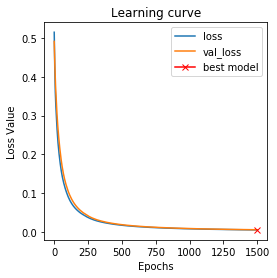

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()

TASK 5 Convolutional Neural Network

Sequential API

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [94]:
def model(img_width, img_height, img_ch, base):
        """
        Functional API model.
        name the last layer as "out"; e.g., out = ....
        """        
        input_size = (img_width, img_height, img_ch)
        inputs_layer = Input(shape=input_size, name='input_layer')
        inputs_layer1 = inputs_layer
#         inputs_layer1 = Flatten()(inputs_layer)  For CNN no need to Flatten?
        conv1 = Conv2D(base, kernel_size = (3, 3), activation='relu',
                      strides=1, padding='same',
                      input_shape = (img_width, img_height, img_ch))(inputs_layer1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        conv2 = Conv2D(base*2, kernel_size = (3, 3), activation='relu',
               strides=1, padding='same')(pool1)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#         Dense layer only can handle 1D data?
        inputs_dense = Flatten()(pool2)
        hidden4 = Dense(base*2, activation='relu')(inputs_dense)
        out = Dense(1, activation='sigmoid')(hidden4)
        clf = Model(inputs=inputs_layer, outputs=out)
        clf.summary()
        return clf

In [95]:
# def model(img_ch, img_width, img_height):
#      model = Sequential()
#      model.add(Conv2D(base, kernel_size = (3, 3), activation='relu',
#                       strides=1, padding='same',
#                       input_shape = (img_width, img_height, img_ch)))
#      model.add(MaxPooling2D(pool_size=(2, 2)))
 
#      model.add(Conv2D(base*2, kernel_size = (3, 3), activation='relu',
#                strides=1, padding='same'))
#      model.add(MaxPooling2D(pool_size=(2, 2)))
     
#      model.add(Flatten())
#      model.add(Dense(base*2, activation='relu'))
#      model.add(Dense(1, activation='sigmoid'))
#      model.summary()
#      return model

In [102]:
firstlayer = 32
batchsize = 8
n_epochs = 200   # 20
learningrate = 0.0001   #0.00001

clf =  model(img_w, img_h, 1,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = SGD(lr = learningrate),
              metrics=['binary_accuracy'])

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                419

In [103]:
clf_hist2 = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))

Train on 1 samples, validate on 1 samples
Epoch 1/200
1/1 [==============================] - 0s 350ms/sample - loss: 0.6749 - binary_accuracy: 1.0000 - val_loss: 0.6676 - val_binary_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 24ms/sample - loss: 0.6698 - binary_accuracy: 1.0000 - val_loss: 0.6632 - val_binary_accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.6647 - binary_accuracy: 1.0000 - val_loss: 0.6588 - val_binary_accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.6597 - binary_accuracy: 1.0000 - val_loss: 0.6545 - val_binary_accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.6554 - binary_accuracy: 1.0000 - val_loss: 0.6504 - val_binary_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.6511 - binary_accuracy: 1.0000 - val_loss: 0.6464 - val_binary_accuracy: 1.0000
Epoch 7/200
1/1 [========

Epoch 54/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.4972 - binary_accuracy: 1.0000 - val_loss: 0.5035 - val_binary_accuracy: 1.0000
Epoch 55/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.4946 - binary_accuracy: 1.0000 - val_loss: 0.5010 - val_binary_accuracy: 1.0000
Epoch 56/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.4921 - binary_accuracy: 1.0000 - val_loss: 0.4985 - val_binary_accuracy: 1.0000
Epoch 57/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.4895 - binary_accuracy: 1.0000 - val_loss: 0.4961 - val_binary_accuracy: 1.0000
Epoch 58/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.4870 - binary_accuracy: 1.0000 - val_loss: 0.4937 - val_binary_accuracy: 1.0000
Epoch 59/200
1/1 [==============================] - 0s 10ms/sample - loss: 0.4844 - binary_accuracy: 1.0000 - val_loss: 0.4912 - val_binary_accuracy: 1.0000
Epoch 60/200
1/1 [==============================] - 0s 26ms/sam

Epoch 107/200
1/1 [==============================] - 0s 9ms/sample - loss: 0.3816 - binary_accuracy: 1.0000 - val_loss: 0.3909 - val_binary_accuracy: 1.0000
Epoch 108/200
1/1 [==============================] - 0s 9ms/sample - loss: 0.3797 - binary_accuracy: 1.0000 - val_loss: 0.3890 - val_binary_accuracy: 1.0000
Epoch 109/200
1/1 [==============================] - 0s 26ms/sample - loss: 0.3779 - binary_accuracy: 1.0000 - val_loss: 0.3872 - val_binary_accuracy: 1.0000
Epoch 110/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.3760 - binary_accuracy: 1.0000 - val_loss: 0.3854 - val_binary_accuracy: 1.0000
Epoch 111/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.3742 - binary_accuracy: 1.0000 - val_loss: 0.3836 - val_binary_accuracy: 1.0000
Epoch 112/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.3724 - binary_accuracy: 1.0000 - val_loss: 0.3818 - val_binary_accuracy: 1.0000
Epoch 113/200
1/1 [==============================] - 0s 8

Epoch 160/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.2958 - binary_accuracy: 1.0000 - val_loss: 0.3056 - val_binary_accuracy: 1.0000
Epoch 161/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.2944 - binary_accuracy: 1.0000 - val_loss: 0.3042 - val_binary_accuracy: 1.0000
Epoch 162/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.2930 - binary_accuracy: 1.0000 - val_loss: 0.3028 - val_binary_accuracy: 1.0000
Epoch 163/200
1/1 [==============================] - 0s 9ms/sample - loss: 0.2916 - binary_accuracy: 1.0000 - val_loss: 0.3014 - val_binary_accuracy: 1.0000
Epoch 164/200
1/1 [==============================] - 0s 28ms/sample - loss: 0.2902 - binary_accuracy: 1.0000 - val_loss: 0.3000 - val_binary_accuracy: 1.0000
Epoch 165/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.2889 - binary_accuracy: 1.0000 - val_loss: 0.2986 - val_binary_accuracy: 1.0000
Epoch 166/200
1/1 [==============================] - 0s 7

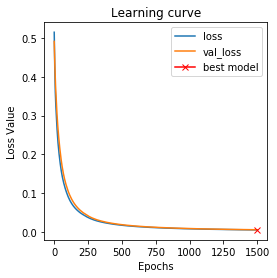

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()